In [ ]:
# Colab Pro 
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 21 11:20:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


##**0. RTT Data Augmentation**

In [ ]:
# Reading the file
#<Train Data> f_train: file formal, i_train: file informal 
f_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/train_formal", "r", encoding = 'utf-8')
i_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/train_informal", "r", encoding = 'utf-8')
f_text = f_train.read()
i_text = i_train.read()

#<Validate Data> f_val: file formal, i_val: file informal
f_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/validation_formal", "r", encoding = 'utf-8')
i_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/validation_informal", "r", encoding = 'utf-8')
fv_text = f_val.read()
iv_text = i_val.read()

#<Test Data> f_test: file formal, i_test: file informal 
f_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/test_formal", "r", encoding = 'utf-8')
i_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/test_informal", "r", encoding = 'utf-8')
ft_text = f_test.read()
it_text = i_test.read()

# Removing last instance after splitting as it is empty string
f_text = f_text.split('\n')[:-1]
i_text = i_text.split('\n')[:-1]
fv_text = fv_text.split('\n')[:-1]
iv_text = iv_text.split('\n')[:-1]
ft_text = ft_text.split('\n')[:-1]
it_text = it_text.split('\n')[:-1]


#Entertainment & Family
#<Train Data> sf_train: file formal, si_train: file informal 
sf_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/train_formal", "r", encoding = 'utf-8')
si_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/train_informal", "r", encoding = 'utf-8')
sf_text = sf_train.read()
si_text = si_train.read()

#<Validate Data> sf_val: file formal, si_val: file informal
sf_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/validation_formal", "r", encoding = 'utf-8')
si_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/validation_informal", "r", encoding = 'utf-8')
sfv_text = sf_val.read()
siv_text = si_val.read()

#<Test Data> sf_test: file formal, si_test: file informal 
sf_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/test_formal", "r", encoding = 'utf-8')
si_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/test_informal", "r", encoding = 'utf-8')
sft_text = sf_test.read()
sit_text = si_test.read()

# Removing last instance after splitting as it is empty string
f_text.extend(sf_text.split('\n')[:-1])
i_text.extend(si_text.split('\n')[:-1])
fv_text.extend(sfv_text.split('\n')[:-1])
iv_text.extend(siv_text.split('\n')[:-1])
ft_text.extend(sft_text.split('\n')[:-1])
it_text.extend(sit_text.split('\n')[:-1])


# Creating the pandas dataframe
data_train = [[f_text[i], i_text[i]] for i in list(range(0, len(f_text)))]
data_val = [[fv_text[i], iv_text[i]] for i in list(range(0, len(fv_text)))]
data_test = [[ft_text[i], it_text[i]] for i in list(range(0, len(ft_text)))]

#Close file
f_train.close()
i_train.close()
f_val.close()
i_val.close()
f_test.close()
i_test.close()

sf_train.close()
si_train.close()
sf_val.close()
si_val.close()
sf_test.close()
si_test.close()


#Create dataframe
df = pd.DataFrame(data_train, columns = ['Formal text', 'Informal text'])
df_v = pd.DataFrame(data_val, columns = ['Formal text', 'Informal text'])
df_t = pd.DataFrame(data_test, columns = ['Formal text', 'Informal text'])

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 8.1 MB/s 


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 8.2 MB/s 
     |████████████████████████████████| 3.3 MB 50.4 MB/s 
     |████████████████████████████████| 596 kB 43.8 MB/s 
     |████████████████████████████████| 895 kB 57.4 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import sentencepiece
from transformers import AutoTokenizer
AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-zh")

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/786k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

PreTrainedTokenizer(name_or_path='Helsinki-NLP/opus-mt-en-zh', vocab_size=65001, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'})

In [ ]:
!pip install nlpaug
# pandas 1.1.5 재설치

     |████████████████████████████████| 409 kB 9.0 MB/s 
     |████████████████████████████████| 11.3 MB 43.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [ ]:
# NLP augmentation
import nlpaug.augmenter.word as naw
import sentencepiece
aug = naw.BackTranslationAug(from_model_name='Helsinki-NLP/opus-mt-en-zh', 
                             to_model_name='Helsinki-NLP/opus-mt-zh-en', 
                             name='BackTranslationAug', 
                             device='cuda', 
                             batch_size=32,
                             force_reload=False,
                             verbose=0)

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/786k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

In [ ]:
# Train formal augmenation
train_formal_aug = []
for i in range(len(df['Formal text'])):
  tmp = aug.augment(df['Formal text'][i])
  train_formal_aug.append(tmp)

In [ ]:
train_formal_aug

["I'd rather have that guy ask me.",
 'I was insulted by my wife.',
 "You'll have more friends than you want.",
 "It's good to see your picture of who you're talking to.",
 'I need to know what to do.',
 'Love me, love me, dear God love me!',
 "It won't be a word, it'll be an opera.",
 'I like my life, except for her screaming in dirty language.',
 'I know how it is.',
 'Does he have a favorite sports team?',
 "When you're gone, he'll do it over and over and over again.",
 'I suggest, "Look, this doesn\'t work for me anymore."',
 "No, sister, I don't think so.",
 'Then kiss her, brother. Every time.',
 'Women mature faster than men, and some men never mature.',
 "I'll never buy her a present again.",
 'You can go to class with her, if you want.',
 'When you choose to be rich and strong, it happens.',
 "Please don't ask for love, money or respect.",
 "You'll know when you're in love.",
 "Don't build your relationship on money or material.",
 'If someone asks, "How can I get my boyfriend

In [ ]:
df_aug = pd.DataFrame({"Formal text" : train_formal_aug,
                       "Informal text" : df['Informal text']})

In [ ]:
print(df_aug)

                                              Formal text                                      Informal text
0                        I'd rather have that guy ask me.  Sure, it's ok, but I always have let the guy a...
1                              I was insulted by my wife.  Hmmm, I'm a guy suffering from verbal abuse fr...
2                 You'll have more friends than you want.     You will have more friends that you want... ;)
3       It's good to see your picture of who you're ta...  It's nice, you get to see pictures of who you ...
4                              I need to know what to do.                           I NEED TO KNOW WHAT 2 DO
...                                                   ...                                                ...
104557  Please send your ID to my messenger. My ID is ...  Amzing,Hilarouus plz sendur id so i can add u ...
104558  Visit yahoo. com and click on music. From ther...  Go to yahoo.com then click on music and type i...
104559             

In [ ]:
!pip install pandas==1.1.5

In [ ]:
df_aug.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_augmented_chinese', index=False, encoding = 'utf-8')

In [ ]:
# df_aug와 original 합치기
df_aug = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_augmented_chinese')
df = df.append(df_aug)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
len(df)

209124

In [ ]:
del df['index']
df.tail()

,Formal text,Informal text
209119,Please send your ID to my messenger. My ID is ...,"Amzing,Hilarouus plz sendur id so i can add u ..."
209120,Visit yahoo. com and click on music. From ther...,Go to yahoo.com then click on music and type i...
209121,Please shave or try nair.,hell yea shave that shit please or try nair
209122,"She grew up to be a bad guy, raping innocent b...",she grew up to become an evil old person who r...
209123,"Send me a message, please. I'll send you a mes...",I have it if you would like it... message me a...


In [ ]:
df.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt_chinese', index=False, encoding = 'utf-8')

In [ ]:
# RTT dataset 병합 (다연/지수 나눠서 진행한 경우)
rtt_1 = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt_1')
rtt_2 = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt_2')
df = rtt_1.append(rtt_2, ignore_index=True)

encoder_inp = '<' + df['Formal text'].astype(str) + '>'
decoder_inp = '<' + df['Informal text'].astype(str)
decoder_out = df['Informal text'].astype(str) + '>'

preprocessed_data = pd.DataFrame()
preprocessed_data['encoder_inp'] = encoder_inp
preprocessed_data['decoder_inp'] = decoder_inp
preprocessed_data['decoder_out'] = decoder_out

preprocessed_data = preprocessed_data[preprocessed_data['encoder_inp'].apply(len) <= 150]
preprocessed_data = preprocessed_data[preprocessed_data['decoder_inp'].apply(len) <= 150]
preprocessed_data = preprocessed_data[preprocessed_data['decoder_out'].apply(len) <= 150]

train = preprocessed_data
train.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt', index=False, encoding = 'utf-8')

##**1. Data processing**

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, tensorflow as tf
import joblib, re, os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu

# NLP augmentation package
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##**2. Loading and Preprocessing Data**

###**2.1 Loading data**

In [ ]:
# Reading the file
#<Train Data> f_train: file formal, i_train: file informal 
f_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/train_formal", "r", encoding = 'utf-8')
i_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/train_informal", "r", encoding = 'utf-8')
f_text = f_train.read()
i_text = i_train.read()

#<Validate Data> f_val: file formal, i_val: file informal
f_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/validation_formal", "r", encoding = 'utf-8')
i_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/validation_informal", "r", encoding = 'utf-8')
fv_text = f_val.read()
iv_text = i_val.read()

#<Test Data> f_test: file formal, i_test: file informal 
f_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/test_formal", "r", encoding = 'utf-8')
i_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Family_Relationships/test_informal", "r", encoding = 'utf-8')
ft_text = f_test.read()
it_text = i_test.read()

# Removing last instance after splitting as it is empty string
f_text = f_text.split('\n')[:-1]
i_text = i_text.split('\n')[:-1]
fv_text = fv_text.split('\n')[:-1]
iv_text = iv_text.split('\n')[:-1]
ft_text = ft_text.split('\n')[:-1]
it_text = it_text.split('\n')[:-1]


#Entertainment & Family
#<Train Data> sf_train: file formal, si_train: file informal 
sf_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/train_formal", "r", encoding = 'utf-8')
si_train = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/train_informal", "r", encoding = 'utf-8')
sf_text = sf_train.read()
si_text = si_train.read()

#<Validate Data> sf_val: file formal, si_val: file informal
sf_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/validation_formal", "r", encoding = 'utf-8')
si_val = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/validation_informal", "r", encoding = 'utf-8')
sfv_text = sf_val.read()
siv_text = si_val.read()

#<Test Data> sf_test: file formal, si_test: file informal 
sf_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/test_formal", "r", encoding = 'utf-8')
si_test = open("/content/drive/MyDrive/KU/2021-2학기/자연어처리/GYFAC_Corpus/Entertainment_Music/test_informal", "r", encoding = 'utf-8')
sft_text = sf_test.read()
sit_text = si_test.read()

# Removing last instance after splitting as it is empty string
f_text.extend(sf_text.split('\n')[:-1])
i_text.extend(si_text.split('\n')[:-1])
fv_text.extend(sfv_text.split('\n')[:-1])
iv_text.extend(siv_text.split('\n')[:-1])
ft_text.extend(sft_text.split('\n')[:-1])
it_text.extend(sit_text.split('\n')[:-1])


# Creating the pandas dataframe
data_train = [[f_text[i], i_text[i]] for i in list(range(0, len(f_text)))]
data_val = [[fv_text[i], iv_text[i]] for i in list(range(0, len(fv_text)))]
data_test = [[ft_text[i], it_text[i]] for i in list(range(0, len(ft_text)))]

#Close file
f_train.close()
i_train.close()
f_val.close()
i_val.close()
f_test.close()
i_test.close()

sf_train.close()
si_train.close()
sf_val.close()
si_val.close()
sf_test.close()
si_test.close()


#Create dataframe
df = pd.DataFrame(data_train, columns = ['Formal text', 'Informal text'])
df_v = pd.DataFrame(data_val, columns = ['Formal text', 'Informal text'])
df_t = pd.DataFrame(data_test, columns = ['Formal text', 'Informal text'])

In [ ]:
df.head() # Train data dataframe

,Formal text,Informal text
0,I prefer to let the guy ask me.,"Sure, it's ok, but I always have let the guy a..."
1,I suffer through verbal abuse from my wife.,"Hmmm, I'm a guy suffering from verbal abuse fr..."
2,You will have more friends than you want.,You will have more friends that you want... ;)
3,It's nice that you get to see pictures of who ...,"It's nice, you get to see pictures of who you ..."
4,I need to know what to do.,I NEED TO KNOW WHAT 2 DO


In [ ]:
df.shape

(104562, 2)

In [ ]:
df_v.head() # Validate data dataframe

,Formal text,Informal text
0,Someone is tracking his every step.,Now the devils hell hounds are tracking his ev...
1,Tell her to find something to do with her life.,Tell her to get a life
2,You'll be unable to do what your speaking about.,You can't do what you are asking.
3,In the event he actually is unfamiliar with th...,As long as he really doesnt know the chicks it...
4,He will love you more.,he will love you so much more ...


In [ ]:
df_v.shape

(4603, 2)

In [ ]:
df_t.head() # Test data dataframe

,Formal text,Informal text
0,I mean that you have to really be her friend.,and i mean Really be her friend.
1,Are you posing a rhetorical question?,Sounds like a rhetorical question :)
2,Men pretend to love in order to have intercour...,"Men play at love to get sex, women play at sex..."
3,I do not intend to be mean.,I don't want to be mean.
4,I would estimate an average of 45% initially b...,on average id say about 45% at first but than ...


In [ ]:
df_t.shape

(2101, 2)

- train 데이터: 104,562
- validation 데이터: 4,603
- test 데이터: 2,101

###**2.2 Preprocessing the Dataset**

In [ ]:
# Creating encoder inp, decoder inp and decoder_out 

#(1) Train data
encoder_inp = '<' + df['Formal text'].astype(str) + '>'
decoder_inp = '<' + df['Informal text'].astype(str)
decoder_out = df['Informal text'].astype(str) + '>'

#(2) Validate data
encoder_inp_v = '<' + df_v['Formal text'].astype(str) + '>'
decoder_inp_v = '<' + df_v['Informal text'].astype(str)
decoder_out_v = df_v['Informal text'].astype(str) + '>'

#(3) Test data
encoder_inp_t = '<' + df_t['Formal text'].astype(str) + '>'
decoder_inp_t = '<' + df_t['Informal text'].astype(str)
decoder_out_t = df_t['Informal text'].astype(str) + '>'

# Creating the dataframe
#(1) Train data dataframe
preprocessed_data = pd.DataFrame()
preprocessed_data['encoder_inp'] = encoder_inp
preprocessed_data['decoder_inp'] = decoder_inp
preprocessed_data['decoder_out'] = decoder_out

#(2) Validate data dataframe
preprocessed_data_v = pd.DataFrame()
preprocessed_data_v['encoder_inp'] = encoder_inp_v
preprocessed_data_v['decoder_inp'] = decoder_inp_v
preprocessed_data_v['decoder_out'] = decoder_out_v

#(3) Test data dataframe
preprocessed_data_t = pd.DataFrame()
preprocessed_data_t['encoder_inp'] = encoder_inp_t
preprocessed_data_t['decoder_inp'] = decoder_inp_t
preprocessed_data_t['decoder_out'] = decoder_out_t

In [ ]:
preprocessed_data.head() # Train data dataframe

,encoder_inp,decoder_inp,decoder_out
0,<I prefer to let the guy ask me.>,"<Sure, it's ok, but I always have let the guy ...","Sure, it's ok, but I always have let the guy a..."
1,<I suffer through verbal abuse from my wife.>,"<Hmmm, I'm a guy suffering from verbal abuse f...","Hmmm, I'm a guy suffering from verbal abuse fr..."
2,<You will have more friends than you want.>,<You will have more friends that you want... ;),You will have more friends that you want... ;)>
3,<It's nice that you get to see pictures of who...,"<It's nice, you get to see pictures of who you...","It's nice, you get to see pictures of who you ..."
4,<I need to know what to do.>,<I NEED TO KNOW WHAT 2 DO,I NEED TO KNOW WHAT 2 DO>


In [ ]:
preprocessed_data_v.head() # Validate data dataframe

,encoder_inp,decoder_inp,decoder_out
0,<Someone is tracking his every step.>,<Now the devils hell hounds are tracking his e...,Now the devils hell hounds are tracking his ev...
1,<Tell her to find something to do with her life.>,<Tell her to get a life,Tell her to get a life>
2,<You'll be unable to do what your speaking abo...,<You can't do what you are asking.,You can't do what you are asking.>
3,<In the event he actually is unfamiliar with t...,<As long as he really doesnt know the chicks i...,As long as he really doesnt know the chicks it...
4,<He will love you more.>,<he will love you so much more ...,he will love you so much more ...>


In [ ]:
preprocessed_data_t.head() # Test data dataframe

,encoder_inp,decoder_inp,decoder_out
0,<I mean that you have to really be her friend.>,<and i mean Really be her friend.,and i mean Really be her friend.>
1,<Are you posing a rhetorical question?>,<Sounds like a rhetorical question :),Sounds like a rhetorical question :)>
2,<Men pretend to love in order to have intercou...,"<Men play at love to get sex, women play at se...","Men play at love to get sex, women play at sex..."
3,<I do not intend to be mean.>,<I don't want to be mean.,I don't want to be mean.>
4,<I would estimate an average of 45% initially ...,<on average id say about 45% at first but than...,on average id say about 45% at first but than ...


###**2.3 Data shape check with length**

In [ ]:
title_font = {'family': 'Dejavu Sans', 'color': 'black', 'weight': 'bold', 'size': 15}
label_font = {'family': 'Dejavu Sans', 'weight': 'normal', 'size': 11}

#### Check for Train data

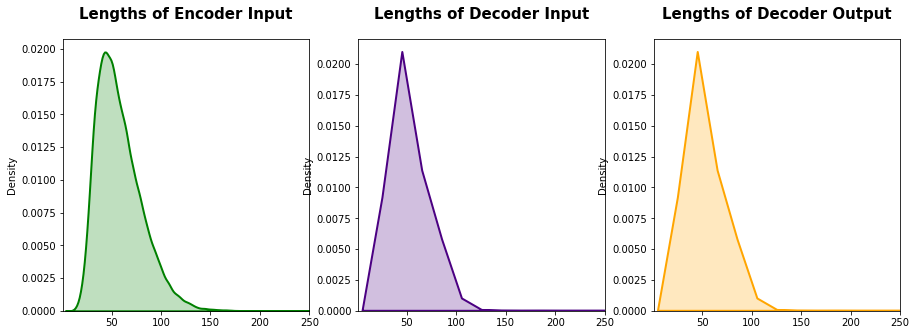

In [ ]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 3)

# plotting the distributions
sns.distplot(preprocessed_data['encoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "green", ax = ax[0])
sns.distplot(preprocessed_data['decoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "indigo", ax = ax[1])
sns.distplot(preprocessed_data['decoder_out'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "orange", ax = ax[2])

# adding titles to the subplots
ax[0].set_xlim(1, 250)
ax[1].set_xlim(1, 250)
ax[2].set_xlim(1, 250)
ax[0].set_title("Lengths of Encoder Input", fontdict = title_font, pad = 20.0)
ax[1].set_title("Lengths of Decoder Input", fontdict = title_font, pad = 20.0)
ax[2].set_title("Lengths of Decoder Output", fontdict = title_font, pad = 20.0)

# rescaling the figure
fig.set_figheight(5)
fig.set_figwidth(15)

####Check for validate data

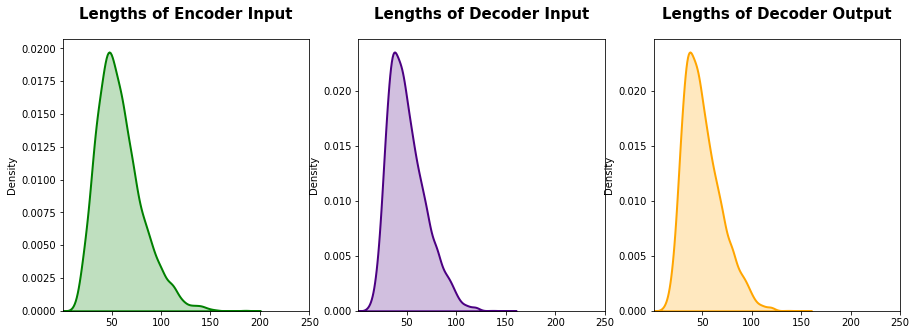

In [ ]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 3)

# plotting the distributions
sns.distplot(preprocessed_data_v['encoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "green", ax = ax[0])
sns.distplot(preprocessed_data_v['decoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "indigo", ax = ax[1])
sns.distplot(preprocessed_data_v['decoder_out'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "orange", ax = ax[2])

# adding titles to the subplots
ax[0].set_xlim(1, 250)
ax[1].set_xlim(1, 250)
ax[2].set_xlim(1, 250)
ax[0].set_title("Lengths of Encoder Input", fontdict = title_font, pad = 20.0)
ax[1].set_title("Lengths of Decoder Input", fontdict = title_font, pad = 20.0)
ax[2].set_title("Lengths of Decoder Output", fontdict = title_font, pad = 20.0)

# rescaling the figure
fig.set_figheight(5)
fig.set_figwidth(15)

####Check for test data

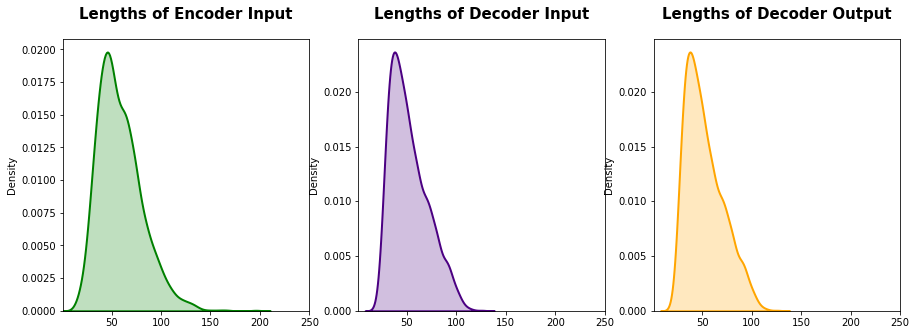

In [ ]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 3)

# plotting the distributions
sns.distplot(preprocessed_data_t['encoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "green", ax = ax[0])
sns.distplot(preprocessed_data_t['decoder_inp'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "indigo", ax = ax[1])
sns.distplot(preprocessed_data_t['decoder_out'].apply(len).values, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, color = "orange", ax = ax[2])

# adding titles to the subplots
ax[0].set_xlim(1, 250)
ax[1].set_xlim(1, 250)
ax[2].set_xlim(1, 250)
ax[0].set_title("Lengths of Encoder Input", fontdict = title_font, pad = 20.0)
ax[1].set_title("Lengths of Decoder Input", fontdict = title_font, pad = 20.0)
ax[2].set_title("Lengths of Decoder Output", fontdict = title_font, pad = 20.0)

# rescaling the figure
fig.set_figheight(5)
fig.set_figwidth(15)

####Drop sentences below length 150

In [ ]:
# Filtering out sentences of length more than 150
preprocessed_data = preprocessed_data[preprocessed_data['encoder_inp'].apply(len) <= 150]
preprocessed_data = preprocessed_data[preprocessed_data['decoder_inp'].apply(len) <= 150]
preprocessed_data = preprocessed_data[preprocessed_data['decoder_out'].apply(len) <= 150]

preprocessed_data_v = preprocessed_data_v[preprocessed_data_v['encoder_inp'].apply(len) <= 150]
preprocessed_data_v = preprocessed_data_v[preprocessed_data_v['decoder_inp'].apply(len) <= 150]
preprocessed_data_v = preprocessed_data_v[preprocessed_data_v['decoder_out'].apply(len) <= 150]

preprocessed_data_t = preprocessed_data_t[preprocessed_data_t['encoder_inp'].apply(len) <= 150]
preprocessed_data_t = preprocessed_data_t[preprocessed_data_t['decoder_inp'].apply(len) <= 150]
preprocessed_data_t = preprocessed_data_t[preprocessed_data_t['decoder_out'].apply(len) <= 150]

In [ ]:
# Rename to train data
train = preprocessed_data
train.head()

,encoder_inp,decoder_inp,decoder_out
0,<I prefer to let the guy ask me.>,"<Sure, it's ok, but I always have let the guy ...","Sure, it's ok, but I always have let the guy a..."
1,<I suffer through verbal abuse from my wife.>,"<Hmmm, I'm a guy suffering from verbal abuse f...","Hmmm, I'm a guy suffering from verbal abuse fr..."
2,<You will have more friends than you want.>,<You will have more friends that you want... ;),You will have more friends that you want... ;)>
3,<It's nice that you get to see pictures of who...,"<It's nice, you get to see pictures of who you...","It's nice, you get to see pictures of who you ..."
4,<I need to know what to do.>,<I NEED TO KNOW WHAT 2 DO,I NEED TO KNOW WHAT 2 DO>


In [ ]:
# Rename to validation 
validation = preprocessed_data_v
validation.head()

,encoder_inp,decoder_inp,decoder_out
0,<Someone is tracking his every step.>,<Now the devils hell hounds are tracking his e...,Now the devils hell hounds are tracking his ev...
1,<Tell her to find something to do with her life.>,<Tell her to get a life,Tell her to get a life>
2,<You'll be unable to do what your speaking abo...,<You can't do what you are asking.,You can't do what you are asking.>
3,<In the event he actually is unfamiliar with t...,<As long as he really doesnt know the chicks i...,As long as he really doesnt know the chicks it...
4,<He will love you more.>,<he will love you so much more ...,he will love you so much more ...>


In [ ]:
# Rename to test
test = preprocessed_data_t
test.head()

,encoder_inp,decoder_inp,decoder_out
0,<I mean that you have to really be her friend.>,<and i mean Really be her friend.,and i mean Really be her friend.>
1,<Are you posing a rhetorical question?>,<Sounds like a rhetorical question :),Sounds like a rhetorical question :)>
2,<Men pretend to love in order to have intercou...,"<Men play at love to get sex, women play at se...","Men play at love to get sex, women play at sex..."
3,<I do not intend to be mean.>,<I don't want to be mean.,I don't want to be mean.>
4,<I would estimate an average of 45% initially ...,<on average id say about 45% at first but than...,on average id say about 45% at first but than ...


In [ ]:
print("Final shape of preprocessed training data: ", train.shape)
print("Final shape of preprocessed validating data: ", validation.shape)
print("Final shape of preprocessed testing data: ", test.shape)

Final shape of preprocessed training data:  (208630, 3)
Final shape of preprocessed validating data:  (4597, 3)
Final shape of preprocessed testing data:  (2097, 3)


In [ ]:
# Save dataframe to excel
train.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt_chinese', index=False, encoding = 'utf-8')
validation.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/validation_data', index=False, encoding = 'utf-8')
test.to_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/test_data', index=False, encoding = 'utf-8')

In [ ]:
# Call baseline dataset
train = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_data')
validation = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/validation_data')
test = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/test_data')

In [ ]:
# Call augmented dataset
train = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/train_rtt_chinese')
validation = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/validation_data')
test = pd.read_csv(r'/content/drive/MyDrive/KU/2021-2학기/자연어처리/Preprocessed/test_data')



###**2.4 Tokenizing data**

In [ ]:
# Tokenizing data and remove common punctuations
tknizer_formal = Tokenizer(filters = '"#$%&()*+-/=@[\\]^_`{|}~\t\n', lower = False, char_level = True)
tknizer_informal = Tokenizer(filters = '"#$%&()*+-/=@[\\]^_`{|}~\t\n', lower = False, char_level = True)

#Learn the '>' token
train.iloc[0]['encoder_inp']= str(train.iloc[0]['encoder_inp']) + '>'
train['decoder_inp'].iloc[0] = train['decoder_inp'].iloc[0] + '>'
tknizer_formal.fit_on_texts(train['encoder_inp'].values)
tknizer_informal.fit_on_texts(train['decoder_inp'].values)

joblib.dump(tknizer_formal, '/content/drive/MyDrive/KU/2021-2학기/자연어처리/tknizer_formal_aug.pkl')
joblib.dump(tknizer_informal, '/content/drive/MyDrive/KU/2021-2학기/자연어처리/tknizer_informal_aug.pkl')

['/content/drive/MyDrive/KU/2021-2학기/자연어처리/tknizer_informal_aug.pkl']

In [ ]:
# Printing sizes of vocabularies (check)
vocab_size_formal = len(tknizer_formal.word_index.keys())
vocab_size_informal = len(tknizer_informal.word_index.keys())
print(f"Vocab size of Formal text: {vocab_size_formal} \nVocab size of Informal text: {vocab_size_informal}")

Vocab size of Formal text: 135 
Vocab size of Informal text: 161


###**2.5 Padding data**

In [ ]:
# Encoding the sentences by numerical ids in place of words
encoder_seq = tknizer_formal.texts_to_sequences(train['encoder_inp'].values)
decoder_inp_seq = tknizer_informal.texts_to_sequences(train['decoder_inp'].values)
decoder_out_seq = tknizer_informal.texts_to_sequences(train['decoder_out'].values)

# Padding the sentences to make all the sentences of same length
encoder_seq = pad_sequences(encoder_seq, maxlen = 150, dtype='int32', padding='post')
decoder_inp_seq = pad_sequences(decoder_inp_seq, maxlen = 150, dtype='int32', padding='post')
decoder_out_seq = pad_sequences(decoder_out_seq, maxlen = 150, dtype='int32', padding='post')

In [ ]:
print(f"First Encoder sequence: \n{encoder_seq[0]}")
print(f"First Decoder input sequence: \n{decoder_inp_seq[0]}")
print(f"First Decoder output sequence: \n{decoder_out_seq[0]}")

First Encoder sequence: 
[17 24  1 25 10  2 22  2 10  1  4  3  1 11  2  4  1  4  9  2  1 21 12 14
  1  5  8 27  1 15  2 18 16 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
First Decoder input sequence: 
[16 34 12 10  2 27  1  6  3 29  8  1  4 23 27  1 22 12  3  1 26  1  5 11
 18  5 14  8  1  9  5 25  2  1 11  2  3  1  3  9  2  1 19 12 14  1  5  8
 23  1 17  2 15 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
First Decoder output sequenc

##**3. Data Pipeline**

###3.1 Preprocessing the Data

In [ ]:
class PreprocessData():
    def __init__(self, data, tknizer_formal, tknizer_informal, max_len):
        self.encoder_inps = data['encoder_inp'].values
        self.decoder_inps = data['decoder_inp'].values
        self.decoder_outs = data['decoder_out'].values
        self.tknizer_informal = tknizer_informal
        self.tknizer_formal = tknizer_formal
        self.max_len = max_len

    def __getitem__(self, i):
        '''
        Tokenize data, zero-pad to make all sequences of same length.
        '''
        # Tokenizing the sequences by passing them in lists as required by tokenizer
        self.encoder_inp_seq = self.tknizer_formal.texts_to_sequences([self.encoder_inps[i]])
        self.decoder_inp_seq = self.tknizer_informal.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_informal.texts_to_sequences([self.decoder_outs[i]])
        # Padding the sequences with zeros
        self.encoder_inp_seq = pad_sequences(self.encoder_inp_seq, maxlen = self.max_len, dtype = 'int32', padding = 'post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen = self.max_len, dtype = 'int32', padding = 'post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen = self.max_len, dtype = 'int32', padding = 'post')
        return self.encoder_inp_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self):
        '''
        Required for model.fit method to keep logs.
        '''
        return len(self.encoder_inps)

###**3.2 Dataloader**###

In [ ]:
class Dataloader(tf.keras.utils.Sequence):    

    def __init__(self, dataset, batch_size = 1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        '''
        Pack the input data in tuple format: ([[encoder_inp], [decoder_inp]], decoder_out)
        '''
        # Tracking indices of start and stop
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # Creating data in tuple form
        batch = [np.squeeze(np.stack(samples, axis = 1), axis = 0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):
        '''
        Required for model.fit method to keep logs.
        '''
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        '''
        Callback to shuffle the indices of data on each epoch.
        '''
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
# Defining parameters
BATCH_SIZE = 128
MAX_LEN = 150

# Preprocessing data
train_dataset = PreprocessData(train, tknizer_formal, tknizer_informal, MAX_LEN)
validation_dataset  = PreprocessData(validation, tknizer_formal, tknizer_informal, MAX_LEN)

# Creating Dataloader
train_dataloader = Dataloader(train_dataset, batch_size = BATCH_SIZE)
validation_dataloader = Dataloader(validation_dataset, batch_size = BATCH_SIZE)

In [ ]:
# Checking the dimensions (Train_dataloader)
print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(128, 150) (128, 150) (128, 150)


In [ ]:
# Checking the dimensions  (Validation_dataloader)
print(validation_dataloader[0][0][0].shape, validation_dataloader[0][0][1].shape, validation_dataloader[0][1].shape)

(128, 150) (128, 150) (128, 150)


## **4. Encoder-Decoder with Attention**

### **4.1 Encoder**

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder Model
    - Input: input sequence
    - Ouput: encoder_final_hidden_state, encoder_final_current_state
    '''
    def __init__(self, inp_vocab_size, embedding_dim, lstm_size, input_length):
        super().__init__()
        
        seed = 42
        # Initializing the parameters
        '''
        @param input_dim (int): input dimensionality
        @param embed_size (int): embedding size (dimensionality)
        @param hidden_size (int): hidden state LSTM size (dimensionality)
        @param inp_length (int): input length size
        '''
        self.inp_vocab_size = inp_vocab_size
        self.embedding_dim = embedding_dim
        self.lstm_size = lstm_size
        self.input_length = input_length
        
        # Initializing Embedding layer (use RandomNormal initialization)
        self.embedding = Embedding(input_dim = self.inp_vocab_size, 
                                   output_dim = self.embedding_dim,
                                   embeddings_initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 1, seed = seed),
                                   input_length = self.input_length, 
                                   mask_zero = True, 
                                   name = "Encoder_Embedding")
        
        #Intializing Encoder LSTM layer (2 layers of LSTM)
        self.lstm1 = LSTM(self.lstm_size, 
                          return_state = True, 
                          return_sequences = True,
                          kernel_initializer = tf.keras.initializers.glorot_uniform(seed = seed),
                          recurrent_initializer = tf.keras.initializers.orthogonal(seed = seed), 
                          name = "Encoder_LSTM1")
        self.lstm2 = LSTM(self.lstm_size, 
                          return_state = True, 
                          return_sequences = True,
                          kernel_initializer = tf.keras.initializers.glorot_uniform(seed = seed),
                          recurrent_initializer = tf.keras.initializers.orthogonal(seed = seed),
                          name = "Encoder_LSTM2")

    def call(self, input):
        '''
          - Input: sequence, initial states of Encoder
          1. Passed to Embedding layer
          2. (initial states( Passed to LSTM layer
          - Output: last time step's hidden, current state
        '''
        input_sequence, states = input[0], input[1]
        # Passing input sequence to embedding layer
        input_embedded = self.embedding(input_sequence)

        # Passing embedding layer output to LSTM layer
        self.enc_output, self.last_hidden_state, self.last_current_state = self.lstm1(input_embedded, initial_state = states)
        self.enc_output, self.last_hidden_state, self.last_current_state = self.lstm2(self.enc_output, [self.last_hidden_state, self.last_current_state])
        
        return self.enc_output, self.last_hidden_state, self.last_current_state
      
    def initialize_states(self, batch_size):
      '''
        - Input: batch size
        - Output: initial hidden, current state
        
        If batch_size = n,
        Hidden state size = [n, lstm_units]
        Current state size = [n, lstm_units]
      '''
      # Initialized with tf.zeros
      self.first_hidden_state, self.first_current_state = tf.zeros([batch_size, self.lstm_size]), tf.zeros([batch_size, self.lstm_size])
      return self.first_hidden_state, self.first_current_state

### **4.2 Attention**

In [ ]:
class Attention(tf.keras.Model):
    '''
    Attention model
    - Input: 2 (Decoder_hidden_state, Encoder_output)
    - Output: 2 (Context vector, Attention weights(softmax-scores))
    '''
    def __init__(self, lstm_size, scoring_function):
        super(Attention, self).__init__()

        # Initializing the parameters
        '''
        @param hidden_size (int): hidden state LSTM size (dimensionality)
        @param scoring_function (string): (1)dot (2)general (3)concat
        '''
        self.lstm_size = lstm_size
        self.scoring_function = scoring_function
        
        # Initializing weights for 'dot' scoring function
        if self.scoring_function=='dot': self.V = tf.keras.layers.Dense(1)
        
        # Initializing weights for 'general' scoring function
        if scoring_function == 'general': self.W = tf.keras.layers.Dense(lstm_size)
        
        # Initializing weights for 'concat' scoring function
        if scoring_function == 'concat':
            self.W1 = tf.keras.layers.Dense(lstm_size)
            self.W2 = tf.keras.layers.Dense(lstm_size)
            self.V = tf.keras.layers.Dense(1)
        
    def call(self, input):
        '''
        1. Based on the scoring function(dot, general, concat),
           we will find the score/similarity between decoder_hidden_state and encoder_output.
        2. Multiply score function with encoder_outputs to get context vector.
        '''
        decoder_hidden_state, encoder_output = input[0], input[1]
        if self.scoring_function == 'dot':
            query_with_time_axis = tf.expand_dims(decoder_hidden_state, 1)
            score = self.V(tf.linalg.matmul(encoder_output, query_with_time_axis, transpose_a=False, transpose_b=True))
            
        elif self.scoring_function == 'general':
            decoder_hidden_state = tf.expand_dims(decoder_hidden_state, axis = 2)
            output = self.W(encoder_output)
            score = tf.keras.layers.Dot(axes=(2, 1))([output, decoder_hidden_state])
        
        elif self.scoring_function == 'concat':
            decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1)      
            score = self.V(tf.nn.tanh(self.W1(decoder_hidden_state) + self.W2(encoder_output)))
        
        # Calculating context vector and attention weights
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = tf.reduce_sum(attention_weights * encoder_output, axis=1)
        return context_vector, attention_weights

### **4.3 Time-Step Decoder**
: For each time step, Timestep decoder implement concatenation operation on output of previous timestep of decoder and attention weights computed by attention model. (각 시점마다 Timestep_Decoder은 이전 시점의 출력과 Attention 가중치의 합(concatenation)을 실행시킨다.)

In [ ]:
class Timestep_Decoder(tf.keras.Model):
    '''
    Timestep_Decoder Model
    - Input: one input token at each time
    - Output: final hidden state of LSTM unit
    '''
    def __init__(self, out_vocab_size, embedding_dim, input_length, lstm_size, scoring_function, embedding_matrix = None):
        super().__init__()
        
        # Initialize the parameters
        '''
        @param out_vocab_size (int) : output vocab size
        @param embedding_dim(int): dimensionality of embedding
        @param input_length(int): input length
        @param hidden_size(int): hidden state LSTM dimensionality
        @param scoring_function (string): score function (dot, general, concatenate)
        @param embedding_matrix (string): embbedding matrix from embedding layer
        '''
        seed = 42
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.lstm_size = lstm_size
        self.scoring_function = scoring_function
        self.attention = Attention(self.lstm_size, self.scoring_function)
        self.embedding_matrix = embedding_matrix
        
        # Initialize Embedding layer based on the availability of Embedding matrix
        if self.embedding_matrix is None:
            self.embedding = Embedding(input_dim = self.out_vocab_size, 
                                       output_dim = self.embedding_dim,
                                       embeddings_initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 1, seed = seed),
                                       input_length = self.input_length, 
                                       mask_zero = True, 
                                       name = "embedding_layer_decoder")
        else:
            self.embedding = Embedding(input_dim = self.out_vocab_size, 
                                       output_dim = self.embedding_dim,
                                       embeddings_initializer = tf.keras.initializers.Constant(self.embedding_matrix), trainable = False,
                                       input_length = self.input_length, 
                                       mask_zero = True, 
                                       name = "embedding_layer_decoder")
        
        # Intialize Decoder LSTM layer (2 LSTM layers)
        self.lstm1 = LSTM(self.lstm_size, 
                          return_state = True, 
                          return_sequences = True,
                          kernel_initializer = tf.keras.initializers.glorot_uniform(seed = seed),
                          recurrent_initializer = tf.keras.initializers.orthogonal(seed = seed), 
                          name = "Timestep_Decoder_LSTM1")
        self.lstm2 = LSTM(self.lstm_size, 
                          return_state = True, 
                          return_sequences = True,
                          kernel_initializer = tf.keras.initializers.glorot_uniform(seed = seed),
                          recurrent_initializer = tf.keras.initializers.orthogonal(seed = seed), 
                          name = "Timestep_Decoder_LSTM2")
        
        # Intialize Dense layer(tar_vocab_size) without activation='softmax'
        self.dense = Dense(out_vocab_size)


    def call(self, input):
        # Unpacking the input
        input_token, encoder_output, encoder_hidden, encoder_current = input[0], input[1], input[2], input[3]
        
        # Passing the decoder_input to the embedding layer
        embedded_token = self.embedding(input_token)
        
        # Passing encoder hidden and encoder output to attention model to get context vector
        context_vector, attention_weights = self.attention([encoder_hidden, encoder_output])
        
        # Reshaping context vector for concatenation
        query_with_time_axis = tf.expand_dims(context_vector, 1)
        
        # Concatenating context vector and embedded token
        out_concat = tf.concat([query_with_time_axis, embedded_token], axis = -1)
        
        # Getting final lstm hidden state
        dec_output, encoder_hidden, encoder_current = self.lstm1(out_concat, [encoder_hidden, encoder_current])
        dec_output, encoder_hidden, encoder_current = self.lstm2(dec_output, [encoder_hidden, encoder_current])
        
        # Weighing decoder output by output vocabulary size
        out = self.dense(tf.reshape(dec_output, (-1, dec_output.shape[2])))
        return out, encoder_hidden, encoder_current

### **4.4 Decoder**
: Calls timestep decoder at each timestep and generates the final output tokens.



In [ ]:
class Decoder(tf.keras.Model):
    '''
    Decoder Model with beam search
    - Input: Encoder_states, Decoder_input_sequence
    - Output: final output tokens
    '''
    def __init__(self, out_vocab_size, embedding_dim, input_length, lstm_size, scoring_function, embedding_matrix = None):
        super().__init__()

        # Intializing the parameters
        '''
        @param out_vocab_size (int) : output vocab size
        @param embedding_dim(int): dimensionality of embedding
        @param input_length(int): input length
        @param hidden_size(int): hidden state LSTM dimensionality
        @param scoring_function (string): score function (dot, general, concatenate)
        @param embedding_matrix (string): embbedding matrix from embedding layer
        '''
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.lstm_size = lstm_size
        self.scoring_function = scoring_function
        self.embedding_matrix = embedding_matrix
        
        # Initializing Timestep decoder instance
        self.timestepdecoder = Timestep_Decoder(self.out_vocab_size, 
                                                self.embedding_dim, 
                                                self.input_length,
                                                self.lstm_size, 
                                                self.scoring_function, 
                                                self.embedding_matrix)
    
    @tf.function
    def call(self, input):
        # Unpacking the input
        decoder_input, encoder_output, encoder_hidden, encoder_current = input[0], input[1], input[2], input[3]
        
        # Initializing an empty Tensor array, that will store the outputs at each and every time step
        all_outputs = tf.TensorArray(tf.float32, size = tf.shape(decoder_input)[1], name = "output_array")
        
        # Iterating till the length of the decoder input
        loop = tf.shape(decoder_input)[1]
        for timestep in range(loop):
            output, encoder_hidden, encoder_current = self.timestepdecoder([decoder_input[:, timestep:timestep+1], encoder_output, encoder_hidden, encoder_current])
            all_outputs = all_outputs.write(timestep, output)  # store output in tensor_array
        
        # Reshape
        all_outputs = tf.transpose(all_outputs.stack(), [1,0,2])
        return all_outputs

### **4.5 Model Altogether**

In [ ]:
class Attention_Based_Encoder_Decoder(tf.keras.Model):
    '''
    Attention_Based_Encoder_Decoder Model
    - Initialize both Encoder/Decoder (with TimeStep Decoder) model
    - Ouput: Normalized probabilities of tokens in target vocabulary
    '''
    def __init__(self, input_length, inp_vocab_size, out_vocab_size, lstm_size, scoring_function, batch_size, embedding_dim, embedding_matrix = None):
        super().__init__()

        # Initializing the parameters
        self.input_length = input_length
        self.inp_vocab_size = inp_vocab_size + 1
        self.out_vocab_size = out_vocab_size + 1
        self.lstm_size = lstm_size
        self.scoring_function = scoring_function
        self.batch_size = batch_size
        self.embedding_dim = embedding_dim
        self.embedding_matrix = embedding_matrix
        
        # Encoder Model 
        self.encoder = Encoder(inp_vocab_size = self.inp_vocab_size, 
                               embedding_dim = self.embedding_dim, 
                               lstm_size = self.lstm_size, 
                               input_length = self.input_length)
        
        # Decoder Model
        self.decoder = Decoder(out_vocab_size = self.out_vocab_size, 
                               embedding_dim = self.embedding_dim, 
                               lstm_size = self.lstm_size,
                               scoring_function = self.scoring_function, 
                               input_length = self.input_length, 
                               embedding_matrix = self.embedding_matrix)
    
    def call(self, data):
        '''
        1. Encoder
           : fed with Encoder_input from tuple[0] generated at 3. Data Pipeline
        2. Decoder
           : fed with Decoder_input from tuple[1] generated at 3. Data Pipeline
        '''
        enc_inp, dec_inp = data[0], data[1]
        initial_state = self.encoder.initialize_states(self.batch_size)  # Initialized Encoder state
        encoder_output, encoder_hidden, encoder_current = self.encoder([enc_inp, initial_state]) # Encoder
        final_output = self.decoder([dec_inp, encoder_output, encoder_hidden, encoder_current])  # Decoder
        return final_output

## **5. Model Pipeline**

### **5.1 Loss function**
: loss function that mask padded zeros

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = 'none')

@tf.function
def loss_function(real, pred):
    # Custom loss function doesn't consider loss of padded zeors
    # optimizer = tf.keras.optimizers.Adam()
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

### **5.2 Tensorboard Callback**

In [ ]:
def create_tensorboard_cb(model):
    '''
    Tensorboard Callback
    : provide log directory to keep track of loss while training.
    '''
    import time
    root_logdir = os.path.join(os.curdir, model)
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    logdir = os.path.join(root_logdir, run_id)
    return tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

### **5.3 Predict function**
: predict informal sentence from formal input sentence

In [ ]:
def predict_fn(input_sentence, model):
    '''
    - Input: input sentence(formal), model instance
    - Output: output sentence(informal)

    Step A. Given input sentence, preprocess the punctuations, convert the sentence into integers using tokenizer used earlier.
    Step B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    Step C. Initialize index of '<' as input to decoder. and encoder final states as input_states to decoder
    Step D. Till we reach max_length of decoder or till the model predicted word '>':
            pass the inputs to timestep decoder at each timestep, update the hidden states and get the output token
    Step E. Return the predicted sentence.
    '''
    # Tokenizing and Padding the sentence
    inputs = [tknizer_formal.word_index.get(i, 0) for i in input_sentence]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen = MAX_LEN, padding = 'post')
    inputs = tf.convert_to_tensor(inputs)

    # Initializing result string and hidden states
    result = ''
    hidden = tf.zeros([1, UNITS]), tf.zeros([1, UNITS])
    
    # Getting Encoder outputs
    enc_out, state_h, state_c = model.encoder([inputs, hidden])
    dec_hidden = [state_h, state_c]
    dec_input = tf.expand_dims([tknizer_informal.word_index['<']], 0)
    
    # Running loop until max length or the prediction is '>' token
    for t in range(MAX_LEN):
        # Getting Decoder outputs fot timestep t
        output, state_h, state_c = model.decoder.timestepdecoder([dec_input, enc_out, state_h, state_c])
        # Getting token index having highest probability
        predicted_id = tf.argmax(output[0]).numpy()
        # Getting output token
        if tknizer_informal.index_word.get(predicted_id, '') == '>':
            break
        else:
            result += tknizer_informal.index_word.get(predicted_id, '')
            dec_input = tf.expand_dims([predicted_id], 0)
    return result

## **6. Train Model**

### **6.1 Dot scoring function**

In [ ]:
# Checking out the GPU we have access to
!nvidia-smi

Mon Nov 22 00:29:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check available GPU version
%tensorflow_version 2.x
import tensorflow as tf
import torch

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.random.set_seed(42)
# Defining model parameters
UNITS = 200
# INITIAL_EPOCH = 7
EPOCHS = 12
TRAIN_STEPS = train.shape[0]//BATCH_SIZE
VALID_STEPS = validation.shape[0]//BATCH_SIZE

# Creating callbacks to control model training
learning_rate_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                        factor=0.5, 
                                                        verbose=1, 
                                                        patience=1, 
                                                        min_lr=0.0001)
tensorboard_cb = create_tensorboard_cb("Model_Dot_logs")
stopper_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3,
                                              verbose=1, 
                                              restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Model_Dot",
                                                   save_best_only=True, 
                                                   save_weights_only=False)

In [ ]:
# Defining model instance with 'dot' scoring function
model_dot  = Attention_Based_Encoder_Decoder(input_length = MAX_LEN, 
                                             inp_vocab_size = vocab_size_formal,
                                             out_vocab_size = vocab_size_informal, 
                                             lstm_size = UNITS,
                                             scoring_function = 'dot', 
                                             batch_size = BATCH_SIZE,
                                             embedding_dim = vocab_size_informal, 
                                             embedding_matrix = None)

# Compiling the model using 'adam' optimizer and custom loss function
optimizer = tf.keras.optimizers.Adam(0.01)
model_dot.compile(optimizer = optimizer, loss = loss_function)

# Fitting the model on training data
with tf.device('/device:GPU:0'):  # use GPU for training model
  model_dot.fit(train_dataloader, 
                steps_per_epoch = TRAIN_STEPS, 
                # initial_epoch = INITIAL_EPOCH
                epochs = EPOCHS,
                callbacks = [learning_rate_cb, tensorboard_cb, stopper_cb, checkpoint_cb],
                validation_data = validation_dataloader, 
                validation_steps = VALID_STEPS)
  model_dot.summary()

Epoch 1/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5754

INFO:tensorflow:Assets written to: Model_Dot/assets


INFO:tensorflow:Assets written to: Model_Dot/assets


1629/1629 [==============================] - 2217s 1s/step - loss: 0.5754 - val_loss: 0.4877 - lr: 0.0100
Epoch 2/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4716

INFO:tensorflow:Assets written to: Model_Dot/assets


INFO:tensorflow:Assets written to: Model_Dot/assets


1629/1629 [==============================] - 2225s 1s/step - loss: 0.4716 - val_loss: 0.4051 - lr: 0.0100
Epoch 3/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4146

INFO:tensorflow:Assets written to: Model_Dot/assets


INFO:tensorflow:Assets written to: Model_Dot/assets


1629/1629 [==============================] - 2234s 1s/step - loss: 0.4146 - val_loss: 0.3861 - lr: 0.0100
Epoch 4/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4087

INFO:tensorflow:Assets written to: Model_Dot/assets


INFO:tensorflow:Assets written to: Model_Dot/assets


1629/1629 [==============================] - 2222s 1s/step - loss: 0.4087 - val_loss: 0.3854 - lr: 0.0100
Epoch 5/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5174
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1629/1629 [==============================] - 2173s 1s/step - loss: 0.5174 - val_loss: 0.4828 - lr: 0.0100
Epoch 6/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4623
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
1629/1629 [==============================] - 2183s 1s/step - loss: 0.4623 - val_loss: 0.4193 - lr: 0.0050
Epoch 7/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4189
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Restoring model weights from the end of the best epoch: 4.
1629/1629 [==============================] - 2186s 1s/step - loss: 0.4189 - val_loss: 0.3976 - lr: 0.0025
Epoch 00007: early stopping
Model: "atten

In [ ]:
# Save model 
model_dot.save('/content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_dot_chinese', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_dot_chinese/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_dot_chinese/assets


In [ ]:
# Open saved model
import tensorflow as tf
model_path = '/content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_dot_chinese'
model_dot = tf.saved_model.load(model_path)

### **6.2. BLEU Score**

In [ ]:
# Removing '<' and '>' tokens and postprocessing punctuations to make plain texts
def rem(s):
    if s.startswith('<'):
        s = s[1:]
    if s.endswith('>'):
        s = s[:-1]
    return s
test['formal_pred'] = test['encoder_inp'].apply(rem)
test['informal_pred'] = test['decoder_inp'].apply(rem)

def predictor(s):
    # Modifing predictor using dot scoring function
    result = predict_fn(s, model_dot)
    return result
test['prediction'] = test['formal_pred'].apply(predictor)

# Process inputs for BLEU score
def convert_formals(s):
    return [s.split()]
def convert_predictions(s):
    return s.split()

test['informal_pred'] = test['informal_pred'].apply(convert_formals)
test['prediction'] = test['prediction'].apply(convert_predictions)
bleu_scores_dot = [sentence_bleu(test['informal_pred'].iloc[i], test['prediction'].iloc[i]) for i in range(len(test))]
print(f"Mean BLEU score of prediction(Dot): {np.mean(bleu_scores_dot)}")

Mean BLEU score of prediction(Dot): 0.3155640646141883


In [ ]:
# Predict with model trained with dot scoring function
print("Formal Sentence: The study examined the health effects of passive smoking.")
print(f"Informal Prediction: {predict_fn('The study examined the health effects of passive smoking.', model_dot)}")

Formal Sentence: The study examined the health effects of passive smoking.
Informal Prediction: i think the study effects of passive smoking.


In [ ]:
# Sorting the indices by blue scores
scores = np.array(bleu_scores_dot)
indices = np.argsort(scores)

# Getting worst score indices
worst = indices[:5]

# Getting best score indices
best = indices[-5:][::-1]

print('Best Predictions:')
print("-"*50)
for i in best:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")
print('='*100)

print('Worst Predictions:')
print("-"*50)
for i in worst:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")

Best Predictions:
--------------------------------------------------
Formal Input : I traveled there and he was present.
Expected Output : i went and there he was.
Predicted Output : i traveled there and he was present.
Bleu Score of Prediction : 0.8694417438899827


Formal Input : Don't use that to guide your life.
Expected Output : don't use it to live by.
Predicted Output : it use to guide your life.
Bleu Score of Prediction : 0.8408964152537145


Formal Input : If you want children, then be a homemaker.
Expected Output : If you want kids, then homemaker.
Predicted Output : I want children, then be a homemaker.
Bleu Score of Prediction : 0.8091067115702212


Formal Input : The man I am attracted to is angry with me.
Expected Output : the guy i like is mad at me.
Predicted Output : the man i am attracted to is any much me.
Bleu Score of Prediction : 0.7952707287670506


Formal Input : Do not worry about what others say.
Expected Output : Don't worry what people will say.
Predicted Ou

Text(0, 0.5, 'Count')

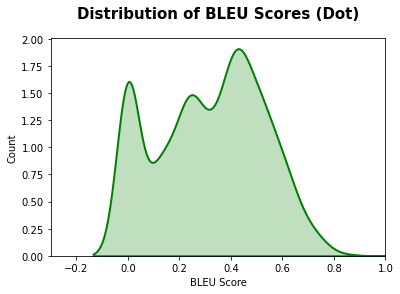

In [ ]:
title_font = {'family': 'Dejavu Sans', 'color': 'black', 'weight': 'bold', 'size': 15}
label_font = {'family': 'Dejavu Sans', 'weight': 'normal', 'size': 11}
fig, ax = plt.subplots(1, 1)

# plotting the distributions
plot = sns.distplot(bleu_scores_dot, 
             hist = False, 
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             color = "green")

# adding titles to the subplots
plot.set_xlim(-0.3, 1)
plot.set_title("Distribution of BLEU Scores (Dot)", fontdict = title_font, pad = 20.0)
plot.set_xlabel("BLEU Score")
plot.set_ylabel("Count")

### **6.3 General scoring function**

In [ ]:
tf.random.set_seed(42)
# Defining model instance with 'general' scoring function
model_general  = Attention_Based_Encoder_Decoder(input_length = MAX_LEN, 
                                                 inp_vocab_size = vocab_size_formal,
                                                 out_vocab_size = vocab_size_informal, 
                                                 lstm_size = UNITS,
                                                 scoring_function = 'general', 
                                                 batch_size = BATCH_SIZE,
                                                 embedding_dim = vocab_size_informal, 
                                                 embedding_matrix = None)

# Compiling the model using 'adam' optimizer and custom loss function
optimizer = tf.keras.optimizers.Adam(0.01)
model_general.compile(optimizer = optimizer, loss = loss_function)

# Creating callbacks to control model training
tensorboard_cb = create_tensorboard_cb("Model_General_logs")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Model_General",
                                                    save_best_only = True, 
                                                   save_weights_only = False)

# Fitting the model on training data
with tf.device('/device:GPU:0'): 
  model_general.fit(train_dataloader, steps_per_epoch = TRAIN_STEPS, epochs = EPOCHS,
                callbacks = [learning_rate_cb, tensorboard_cb, stopper_cb, checkpoint_cb],
                validation_data = validation_dataloader, validation_steps = VALID_STEPS)
  model_general.summary()

Epoch 1/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5761

INFO:tensorflow:Assets written to: Model_General/assets


INFO:tensorflow:Assets written to: Model_General/assets


1629/1629 [==============================] - 2244s 1s/step - loss: 0.5761 - val_loss: 0.4939 - lr: 0.0100
Epoch 2/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5191

INFO:tensorflow:Assets written to: Model_General/assets


INFO:tensorflow:Assets written to: Model_General/assets


1629/1629 [==============================] - 2256s 1s/step - loss: 0.5191 - val_loss: 0.4866 - lr: 0.0100
Epoch 3/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5258
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1629/1629 [==============================] - 2199s 1s/step - loss: 0.5258 - val_loss: 0.5068 - lr: 0.0100
Epoch 4/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5083

INFO:tensorflow:Assets written to: Model_General/assets


INFO:tensorflow:Assets written to: Model_General/assets


1629/1629 [==============================] - 2251s 1s/step - loss: 0.5083 - val_loss: 0.4741 - lr: 0.0050
Epoch 5/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5004

INFO:tensorflow:Assets written to: Model_General/assets


INFO:tensorflow:Assets written to: Model_General/assets


1629/1629 [==============================] - 2256s 1s/step - loss: 0.5004 - val_loss: 0.4709 - lr: 0.0050
Epoch 6/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5157
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
1629/1629 [==============================] - 2195s 1s/step - loss: 0.5157 - val_loss: 0.5596 - lr: 0.0050
Epoch 7/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5389
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
1629/1629 [==============================] - 2195s 1s/step - loss: 0.5389 - val_loss: 0.4900 - lr: 0.0025
Epoch 8/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5109
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Restoring model weights from the end of the best epoch: 5.
1629/1629 [==============================] - 2200s 1s/step - loss: 0.5109 - val_loss: 0.4799 - lr: 0.0012
Epoch 00008: early stopping
Model: "atte

In [ ]:
# Save model 
model_general.save('/content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_general_chinese', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_general_chinese/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_general_chinese/assets


In [ ]:
# Calculate BLEU Score
# Removing '<' and '>' tokens and postprocessing punctuations to make plain texts
def rem(s):
    if s.startswith('<'):
        s = s[1:]
    if s.endswith('>'):
        s = s[:-1]
    return s
test['formal_pred'] = test['encoder_inp'].apply(rem)
test['informal_pred'] = test['decoder_inp'].apply(rem)

def predictor(s):
    # Modifing predictor using general scoring function
    result = predict_fn(s, model_general)
    return result
test['prediction'] = test['formal_pred'].apply(predictor)

# Process inputs for BLEU score
def convert_formals(s):
    return [s.split()]
def convert_predictions(s):
    return s.split()

test['informal_pred'] = test['informal_pred'].apply(convert_formals)
test['prediction'] = test['prediction'].apply(convert_predictions)
bleu_scores_gen = [sentence_bleu(test['informal_pred'].iloc[i], test['prediction'].iloc[i]) for i in range(len(test))]
print(f"Mean BLEU score of prediction(General): {np.mean(bleu_scores_gen)}")

Mean BLEU score of prediction(General): 0.30072507777971663


In [ ]:
# Prediction
print("Formal Sentence: The study examined the health effects of passive smoking.")
print(f"Informal Prediction: {predict_fn('The study examined the health effects of passive smoking.', model_general)}")

Formal Sentence: The study examined the health effects of passive smoking.
Informal Prediction: they are a good songs and they are a good songs.


In [ ]:
# Sorting the indices by blue scores
scores = np.array(bleu_scores_gen)
indices = np.argsort(scores)

# Getting worst score indices
worst = indices[:5]

# Getting best score indices
best = indices[-5:][::-1]

print('Best Predictions:')
print("-"*50)
for i in best:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")
print('='*100)

print('Worst Predictions:')
print("-"*50)
for i in worst:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")

Best Predictions:
--------------------------------------------------
Formal Input : It sounds like you both are comfortable with how things are now.
Expected Output : It sounds like you are both comfortable with things just the way they are.
Predicted Output : It sure the same things to think that you want to say that they are a good songs.
Bleu Score of Prediction : 0.7598356856515925


Formal Input : If you are dating the guy you love you need to get rid of your ex.
Expected Output : get rid of the x if you are dating the guy you love right now.
Predicted Output : If you like the same things to the best of them and they are a good songs.
Bleu Score of Prediction : 0.7364279629037999


Formal Input : How good of a president do you think he would be?
Expected Output : and how good of a president do u think he would be?
Predicted Output : he dont have to say the same things and they are a good songs.
Bleu Score of Prediction : 0.7311104457090247


Formal Input : She saw a blonde on the 

Text(0, 0.5, 'Count')

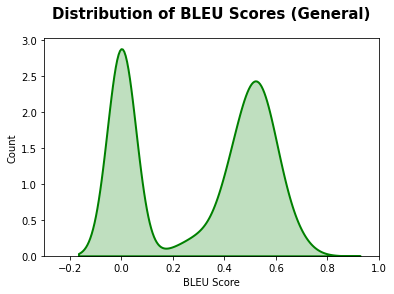

In [ ]:
title_font = {'family': 'Dejavu Sans', 'color': 'black', 'weight': 'bold', 'size': 15}
label_font = {'family': 'Dejavu Sans', 'weight': 'normal', 'size': 11}
fig, ax = plt.subplots(1, 1)

# plotting the distributions
plot = sns.distplot(bleu_scores_gen, 
             hist = False, 
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             color = "green")

# adding titles to the subplots
plot.set_xlim(-0.3, 1)
plot.set_title("Distribution of BLEU Scores (General)", fontdict = title_font, pad = 20.0)
plot.set_xlabel("BLEU Score")
plot.set_ylabel("Count")

### **6.4 Concatenate scoring function**

In [ ]:
# Defining model instance with 'concat' scoring function
model_concat  = Attention_Based_Encoder_Decoder(input_length = MAX_LEN, 
                                             inp_vocab_size = vocab_size_formal,
                                             out_vocab_size = vocab_size_informal, 
                                             lstm_size = UNITS,
                                             scoring_function = 'concat', 
                                             batch_size = BATCH_SIZE,
                                             embedding_dim = vocab_size_informal, 
                                             embedding_matrix = None)

# Compiling the model using 'adam' optimizer and custom loss function
optimizer = tf.keras.optimizers.Adam(0.01)
model_concat.compile(optimizer = optimizer, loss = loss_function)

# Creating callbacks to control model training
learning_rate_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, verbose = 1, patience = 1, min_lr = 0.0001)
tensorboard_cb = create_tensorboard_cb("Model_Concat_logs")
stopper_cb = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1, restore_best_weights = True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Model_Concat",
                                                   save_best_only = True, 
                                                   save_weights_only = False)

# Fitting the model on training data
with tf.device('/device:GPU:0'): 
  model_concat.fit(train_dataloader, steps_per_epoch = TRAIN_STEPS, epochs = EPOCHS,
                callbacks = [learning_rate_cb, tensorboard_cb, stopper_cb, checkpoint_cb],
                validation_data = validation_dataloader, validation_steps = VALID_STEPS)
  model_concat.summary()

Epoch 1/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5796

INFO:tensorflow:Assets written to: Model_Concat/assets


INFO:tensorflow:Assets written to: Model_Concat/assets


1629/1629 [==============================] - 1888s 1s/step - loss: 0.5796 - val_loss: 0.4943 - lr: 0.0100
Epoch 2/12
1629/1629 [==============================] - ETA: 0s - loss: 0.5118

INFO:tensorflow:Assets written to: Model_Concat/assets


INFO:tensorflow:Assets written to: Model_Concat/assets


1629/1629 [==============================] - 1886s 1s/step - loss: 0.5118 - val_loss: 0.4798 - lr: 0.0100
Epoch 3/12
1629/1629 [==============================] - ETA: 0s - loss: 0.4847

INFO:tensorflow:Assets written to: Model_Concat/assets


INFO:tensorflow:Assets written to: Model_Concat/assets


1629/1629 [==============================] - 1884s 1s/step - loss: 0.4847 - val_loss: 0.4498 - lr: 0.0100
Epoch 4/12
1629/1629 [==============================] - ETA: 0s - loss: 0.6304
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1629/1629 [==============================] - 1864s 1s/step - loss: 0.6304 - val_loss: 0.8053 - lr: 0.0100
Epoch 5/12
1629/1629 [==============================] - ETA: 0s - loss: 0.8406
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
1629/1629 [==============================] - 1886s 1s/step - loss: 0.8406 - val_loss: 0.7805 - lr: 0.0050
Epoch 6/12
1629/1629 [==============================] - ETA: 0s - loss: 0.8248
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Restoring model weights from the end of the best epoch: 3.
1629/1629 [==============================] - 1922s 1s/step - loss: 0.8248 - val_loss: 0.7725 - lr: 0.0025
Epoch 00006: early stopping
Model: "atten

In [ ]:
# Save model 
model_concat.save('/content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_concat_chinese', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_concat_chinese/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/KU/2021-2학기/자연어처리/models/model_concat_chinese/assets


In [ ]:
# Calculate BLEU Score
# Removing '<' and '>' tokens and postprocessing punctuations to make plain texts
def rem(s):
    if s.startswith('<'):
        s = s[1:]
    if s.endswith('>'):
        s = s[:-1]
    return s
test['formal_pred'] = test['encoder_inp'].apply(rem)
test['informal_pred'] = test['decoder_inp'].apply(rem)

def predictor(s):
    # Modifing predictor using concat scoring function
    result = predict_fn(s, model_concat)
    return result
test['prediction'] = test['formal_pred'].apply(predictor)

# Process inputs for BLEU score
def convert_formals(s):
    return [s.split()]
def convert_predictions(s):
    return s.split()

test['informal_pred'] = test['informal_pred'].apply(convert_formals)
test['prediction'] = test['prediction'].apply(convert_predictions)
bleu_scores_con = [sentence_bleu(test['informal_pred'].iloc[i], test['prediction'].iloc[i]) for i in range(len(test))]
print(f"Mean BLEU score of prediction(Concat): {np.mean(bleu_scores_con)}")

Mean BLEU score of prediction(Concat): 0.3128193183632838


In [ ]:
# Prediction
print("Formal Sentence: The study examined the health effects of passive smoking.")
print(f"Informal Prediction: {predict_fn('The study examined the health effects of passive smoking.', model_concat)}")

Formal Sentence: The study examined the health effects of passive smoking.
Informal Prediction: The stupid the hot stupid the hot say the hot.


In [ ]:
# Sorting the indices by blue scores
scores = np.array(bleu_scores_con)
indices = np.argsort(scores)

# Getting worst score indices
worst = indices[:5]

# Getting best score indices
best = indices[-5:][::-1]

print('Best Predictions:')
print("-"*50)
for i in best:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")
print('='*100)

print('Worst Predictions:')
print("-"*50)
for i in worst:
    print(f"Formal Input : {test['formal_pred'].iloc[i]}")
    print(f"Expected Output : {' '.join(test['informal_pred'].iloc[i][0])}")
    print(f"Predicted Output : {' '.join(test['prediction'].iloc[i])}")
    print(f"Bleu Score of Prediction : {scores[i]}")
    print("\n")

Best Predictions:
--------------------------------------------------
Formal Input : Try to use your brain and not your manhood, maybe she does not love you.
Expected Output : my be she don't love you but try to use your brean not your haerd
Predicted Output : yeah your braid to u don't you then not love your boy the possible and not love you.
Bleu Score of Prediction : 0.7896895367562644


Formal Input : I wonder if it could ever be the same after that.
Expected Output : could it ever be the same...
Predicted Output : if it could every that way.
Bleu Score of Prediction : 0.7598356856515925


Formal Input : She calls him often.
Expected Output : she calls him all the time.
Predicted Output : She called him of the guy.
Bleu Score of Prediction : 0.7598356856515925


Formal Input : I have never attended it.
Expected Output : i have never been to it
Predicted Output : i don't never always the person.
Bleu Score of Prediction : 0.7598356856515925


Formal Input : Ask him if he would like t

Text(0, 0.5, 'Count')

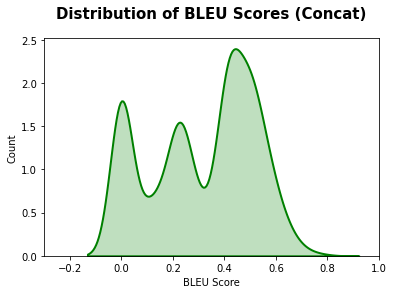

In [ ]:
title_font = {'family': 'Dejavu Sans', 'color': 'black', 'weight': 'bold', 'size': 15}
label_font = {'family': 'Dejavu Sans', 'weight': 'normal', 'size': 11}
fig, ax = plt.subplots(1, 1)

# plotting the distributions
plot = sns.distplot(bleu_scores_con, 
             hist = False, 
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             color = "green")

# adding titles to the subplots
plot.set_xlim(-0.3, 1)
plot.set_title("Distribution of BLEU Scores (Concat)", fontdict = title_font, pad = 20.0)
plot.set_xlabel("BLEU Score")
plot.set_ylabel("Count")